In [359]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Ridge, Lasso
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import skew
import pickle
import json

# 1 Probelm Statement

In [ ]:
To predict the Cancer Deaths Number by using various features.

In [ ]:
Depended varibale (features)= 'Deaths Number'
Indepned varibale=['cancer_type', 'new_cases_number', 'new_cases_rank',
                   'new_case_percent',
       'new_cases_cum_risk', 'death_rank',
                   'death_percentage',
       'Deaths_cum_risk', 'risk_of_prevalence_5yr',
                   'per100k_5yr_prevalence']

# 2 Data Garthering

In [237]:
df = pd.read_csv(r"F:\VELOCITY\Abhishek_Project\cancer_data.csv")
df

,cancer_type,new_cases_number,new_cases_rank,new_case_percent,new_cases_cum_risk,Deaths Number,death_rank,death_percentage,Deaths_cum_risk,risk_of_prevalence_5yr,per100k_5yr_prevalence
0,Anus,5452,30,0.41,0.05,2776,29,0.33,0.03,12278,0.89
1,Bladder,21096,17,1.60,0.19,11154,21,1.30,0.10,49257,3.57
2,"Brain, central nervous system",31460,14,2.40,0.22,26656,10,3.10,0.20,74398,5.39
3,Breast,178361,1,13.50,2.81,90408,1,10.60,1.49,459271,69.28
4,Cervix uteri,123907,3,9.40,2.01,77348,2,9.10,1.30,283842,42.82
5,Colon,31646,13,2.40,0.28,19236,13,2.30,0.17,65493,4.75
6,Corpus uteri,16413,22,1.20,0.29,6385,23,0.75,0.11,43484,6.56
7,Gallbladder,19570,20,1.50,0.17,14736,16,1.70,0.13,25138,1.82
8,Hodgkin lymphoma,9221,26,0.70,0.06,3513,28,0.41,0.03,24928,1.81
9,Hypopharynx,28489,15,2.20,0.26,11443,20,1.30,0.11,39750,2.88


In [239]:
df.columns

Index(['cancer_type', 'new_cases_number', 'new_cases_rank', 'new_case_percent',
       'new_cases_cum_risk', 'Deaths Number', 'death_rank', 'death_percentage',
       'Deaths_cum_risk', 'risk_of_prevalence_5yr', 'per100k_5yr_prevalence'],
      dtype='object')

In [240]:
df.head().T

,0,1,2,3,4
cancer_type,Anus,Bladder,"Brain, central nervous system",Breast,Cervix uteri
new_cases_number,5452,21096,31460,178361,123907
new_cases_rank,30,17,14,1,3
new_case_percent,0.41,1.6,2.4,13.5,9.4
new_cases_cum_risk,0.05,0.19,0.22,2.81,2.01
Deaths Number,2776,11154,26656,90408,77348
death_rank,29,21,10,1,2
death_percentage,0.33,1.3,3.1,10.6,9.1
Deaths_cum_risk,0.03,0.1,0.2,1.49,1.3
risk_of_prevalence_5yr,12278,49257,74398,459271,283842


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cancer_type             35 non-null     object 
 1   new_cases_number        35 non-null     int64  
 2   new_cases_rank          35 non-null     int64  
 3   new_case_percent        35 non-null     float64
 4   new_cases_cum_risk      35 non-null     float64
 5   Deaths Number           35 non-null     int64  
 6   death_rank              35 non-null     int64  
 7   death_percentage        35 non-null     float64
 8   Deaths_cum_risk         35 non-null     float64
 9   risk_of_prevalence_5yr  35 non-null     int64  
 10  per100k_5yr_prevalence  35 non-null     float64
dtypes: float64(5), int64(5), object(1)
memory usage: 3.1+ KB


In [242]:
df.isna().sum()

cancer_type               0
new_cases_number          0
new_cases_rank            0
new_case_percent          0
new_cases_cum_risk        0
Deaths Number             0
death_rank                0
death_percentage          0
Deaths_cum_risk           0
risk_of_prevalence_5yr    0
per100k_5yr_prevalence    0
dtype: int64

# 3 EDA Part

In [243]:
# 1."cancer_type"

In [244]:
df["cancer_type"]

0                              Anus
1                           Bladder
2     Brain, central nervous system
3                            Breast
4                      Cervix uteri
5                             Colon
6                      Corpus uteri
7                       Gallbladder
8                  Hodgkin lymphoma
9                       Hypopharynx
10                   Kaposi sarcoma
11                           Kidney
12                           Larynx
13                        Leukaemia
14                 Lip, oral cavity
15                            Liver
16                             Lung
17                 Melanoma of skin
18                     Mesothelioma
19                 Multiple myeloma
20                      Nasopharynx
21             Non-Hodgkin lymphoma
22                       Oesophagus
23                       Oropharynx
24                            Ovary
25                         Pancreas
26                            Penis
27                         P

In [245]:
df["cancer_type"].unique()

array(['Anus', 'Bladder', 'Brain, central nervous system', 'Breast',
       'Cervix uteri', 'Colon', 'Corpus uteri', 'Gallbladder',
       'Hodgkin lymphoma', 'Hypopharynx', 'Kaposi sarcoma', 'Kidney',
       'Larynx', 'Leukaemia', 'Lip, oral cavity', 'Liver', 'Lung',
       'Melanoma of skin', 'Mesothelioma', 'Multiple myeloma',
       'Nasopharynx', 'Non-Hodgkin lymphoma', 'Oesophagus', 'Oropharynx',
       'Ovary', 'Pancreas', 'Penis', 'Prostate', 'Rectum',
       'Salivary glands', 'Stomach', 'Testis', 'Thyroid', 'Vagina',
       'Vulva'], dtype=object)

In [246]:
df["cancer_type"].nunique()

35

## one hot encoding for "cancer_type"

In [247]:
df = pd.get_dummies(df ,columns=['cancer_type'])
df

,new_cases_number,new_cases_rank,new_case_percent,new_cases_cum_risk,Deaths Number,death_rank,death_percentage,Deaths_cum_risk,risk_of_prevalence_5yr,per100k_5yr_prevalence,...,cancer_type_Pancreas,cancer_type_Penis,cancer_type_Prostate,cancer_type_Rectum,cancer_type_Salivary glands,cancer_type_Stomach,cancer_type_Testis,cancer_type_Thyroid,cancer_type_Vagina,cancer_type_Vulva
0,5452,30,0.41,0.05,2776,29,0.33,0.03,12278,0.89,...,0,0,0,0,0,0,0,0,0,0
1,21096,17,1.60,0.19,11154,21,1.30,0.10,49257,3.57,...,0,0,0,0,0,0,0,0,0,0
2,31460,14,2.40,0.22,26656,10,3.10,0.20,74398,5.39,...,0,0,0,0,0,0,0,0,0,0
3,178361,1,13.50,2.81,90408,1,10.60,1.49,459271,69.28,...,0,0,0,0,0,0,0,0,0,0
4,123907,3,9.40,2.01,77348,2,9.10,1.30,283842,42.82,...,0,0,0,0,0,0,0,0,0,0
5,31646,13,2.40,0.28,19236,13,2.30,0.17,65493,4.75,...,0,0,0,0,0,0,0,0,0,0
6,16413,22,1.20,0.29,6385,23,0.75,0.11,43484,6.56,...,0,0,0,0,0,0,0,0,0,0
7,19570,20,1.50,0.17,14736,16,1.70,0.13,25138,1.82,...,0,0,0,0,0,0,0,0,0,0
8,9221,26,0.70,0.06,3513,28,0.41,0.03,24928,1.81,...,0,0,0,0,0,0,0,0,0,0
9,28489,15,2.20,0.26,11443,20,1.30,0.11,39750,2.88,...,0,0,0,0,0,0,0,0,0,0


In [248]:
# 2.new_cases_number

In [249]:
df["new_cases_number"]

0       5452
1      21096
2      31460
3     178361
4     123907
5      31646
6      16413
7      19570
8       9221
9      28489
10        66
11     16861
12     34687
13     48419
14    135929
15     34743
16     72510
17      3916
18      1709
19     14641
20      5697
21     35828
22     63180
23     20617
24     45701
25     12642
26     10677
27     34540
28     28260
29      7850
30     60222
31      4681
32     20432
33      5518
34      3447
Name: new_cases_number, dtype: int64

<AxesSubplot:xlabel='new_cases_number'>

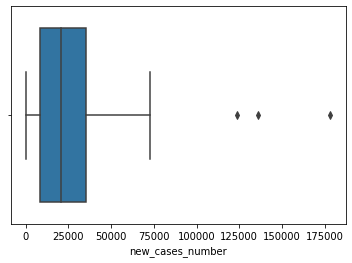

In [250]:
sns.boxplot(x = df['new_cases_number'])

In [251]:
# To detect Extreme Outliers

q1 = df['new_cases_number'].quantile(0.25)
q2 = df['new_cases_number'].quantile(0.50)
q3 = df['new_cases_number'].quantile(0.75)
median = df['new_cases_number'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 8535.5
Q2 : 20617.0
Q3 : 35285.5
median : 20617.0
Upper Tail : 115535.5
Lower Tail : -71714.5


In [252]:
df['new_cases_number'].median()

20617.0

In [253]:
median_new_cases_number = df.loc[(df['new_cases_number'] <= upper_tail) & 
                            (df['new_cases_number'] >= lower_tail),'new_cases_number'].median()
    
median_new_cases_number

20001.0

In [254]:
df.loc[(df['new_cases_number'] > upper_tail) |
                            (df['new_cases_number'] < lower_tail),'new_cases_number'] = median_new_cases_number

In [255]:
df.loc[(df['new_cases_number'] > upper_tail) |
                            (df['new_cases_number'] < lower_tail),'new_cases_number']

Series([], Name: new_cases_number, dtype: int64)

<AxesSubplot:xlabel='new_cases_number'>

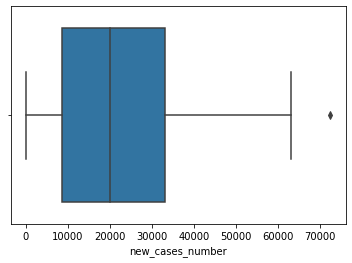

In [256]:
sns.boxplot(x = df['new_cases_number'])

In [257]:
# 3.new_cases_rank

In [258]:
df["new_cases_rank"]

0     30
1     17
2     14
3      1
4      3
5     13
6     22
7     20
8     26
9     15
10    35
11    21
12    11
13     7
14     2
15    10
16     4
17    32
18    34
19    23
20    28
21     9
22     5
23    18
24     8
25    24
26    25
27    12
28    16
29    27
30     6
31    31
32    19
33    29
34    33
Name: new_cases_rank, dtype: int64

<AxesSubplot:xlabel='new_cases_rank'>

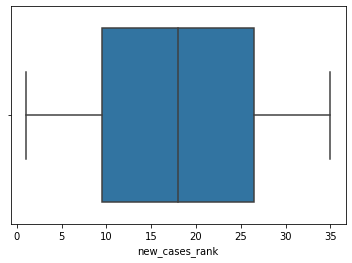

In [259]:
sns.boxplot(x = df['new_cases_rank'])

In [260]:
# 4.new_case_percent

In [261]:
df["new_case_percent"]

0      0.41
1      1.60
2      2.40
3     13.50
4      9.40
5      2.40
6      1.20
7      1.50
8      0.70
9      2.20
10     0.00
11     1.30
12     2.60
13     3.70
14    10.30
15     2.60
16     5.50
17     0.30
18     0.13
19     1.10
20     0.43
21     2.70
22     4.80
23     1.60
24     3.50
25     0.95
26     0.81
27     2.60
28     2.10
29     0.59
30     4.50
31     0.35
32     1.50
33     0.42
34     0.26
Name: new_case_percent, dtype: float64

<AxesSubplot:xlabel='new_case_percent'>

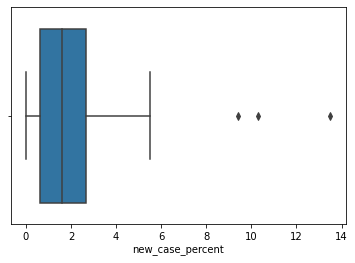

In [262]:
sns.boxplot(x = df['new_case_percent'])

In [263]:
# To detect Extreme Outliers

q1 = df['new_case_percent'].quantile(0.25)
q2 = df['new_case_percent'].quantile(0.50)
q3 = df['new_case_percent'].quantile(0.75)
median = df['new_case_percent'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 0.645
Q2 : 1.6
Q3 : 2.6500000000000004
median : 1.6
Upper Tail : 8.665000000000001
Lower Tail : -5.370000000000001


In [264]:
df['new_case_percent'].median()

1.6

In [265]:
median_new_case_percent = df.loc[(df['new_case_percent'] <= upper_tail) & 
                            (df['new_case_percent'] >= lower_tail),'new_case_percent'].median()
    
median_new_case_percent

1.5

In [266]:
df.loc[(df['new_case_percent'] > upper_tail) |
                            (df['new_case_percent'] < lower_tail),'new_case_percent'] = median_new_case_percent

In [267]:
df.loc[(df['new_case_percent'] > upper_tail) |
                            (df['new_case_percent'] < lower_tail),'new_case_percent']

Series([], Name: new_case_percent, dtype: float64)

<AxesSubplot:xlabel='new_case_percent'>

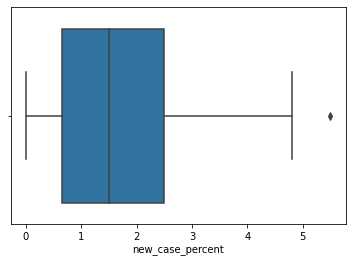

In [268]:
sns.boxplot(x = df['new_case_percent'])

In [269]:
# 5.new_cases_cum_risk

In [270]:
df["new_cases_cum_risk"]

0     0.05
1     0.19
2     0.22
3     2.81
4     2.01
5     0.28
6     0.29
7     0.17
8     0.06
9     0.26
10    0.00
11    0.14
12    0.32
13    0.31
14    1.09
15    0.32
16    0.67
17    0.03
18    0.01
19    0.14
20    0.05
21    0.28
22    0.57
23    0.19
24    0.74
25    0.11
26    0.20
27    0.64
28    0.24
29    0.07
30    0.53
31    0.06
32    0.15
33    0.09
34    0.06
Name: new_cases_cum_risk, dtype: float64

<AxesSubplot:xlabel='new_cases_cum_risk'>

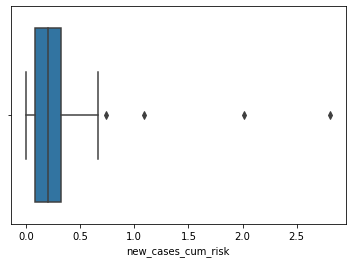

In [271]:
sns.boxplot(x = df['new_cases_cum_risk'])

In [272]:
# To detect Extreme Outliers

q1 = df['new_cases_cum_risk'].quantile(0.25)
q2 = df['new_cases_cum_risk'].quantile(0.50)
q3 = df['new_cases_cum_risk'].quantile(0.75)
median = df['new_cases_cum_risk'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 0.08
Q2 : 0.2
Q3 : 0.32
median : 0.2
Upper Tail : 1.04
Lower Tail : -0.64


In [273]:
df['new_cases_cum_risk'].median()

0.2

In [274]:
median_new_cases_cum_risk = df.loc[(df['new_cases_cum_risk'] <= upper_tail) & 
                            (df['new_cases_cum_risk'] >= lower_tail),'new_cases_cum_risk'].median()
    
median_new_cases_cum_risk

0.19

In [275]:
df.loc[(df['new_cases_cum_risk'] > upper_tail) |
                            (df['new_cases_cum_risk'] < lower_tail),'new_cases_cum_risk'] = median_new_cases_cum_risk

In [276]:
df.loc[(df['new_cases_cum_risk'] > upper_tail) |
                            (df['new_cases_cum_risk'] < lower_tail),'new_cases_cum_risk']

Series([], Name: new_cases_cum_risk, dtype: float64)

<AxesSubplot:xlabel='new_cases_cum_risk'>

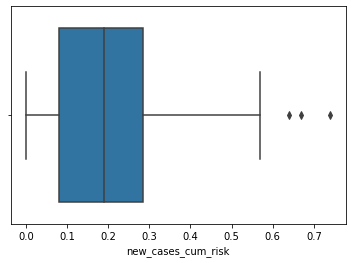

In [277]:
sns.boxplot(x = df['new_cases_cum_risk'])

In [278]:
# 6.death_rank

In [279]:
df["death_rank"]

0     29
1     21
2     10
3      1
4      2
5     13
6     23
7     16
8     28
9     20
10    35
11    22
12    11
13     7
14     3
15     8
16     4
17    31
18    33
19    18
20    27
21    12
22     5
23    17
24     9
25    19
26    26
27    14
28    15
29    24
30     6
31    34
32    25
33    30
34    32
Name: death_rank, dtype: int64

<AxesSubplot:xlabel='death_rank'>

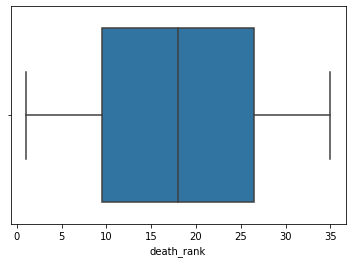

In [280]:
sns.boxplot(x = df['death_rank'])

In [281]:
# 7.death_percentage

In [282]:
df["death_percentage"]

0      0.33
1      1.30
2      3.10
3     10.60
4      9.10
5      2.30
6      0.75
7      1.70
8      0.41
9      1.30
10     0.01
11     1.20
12     2.50
13     4.20
14     8.80
15     4.00
16     7.80
17     0.27
18     0.18
19     1.50
20     0.49
21     2.40
22     6.90
23     1.50
24     3.80
25     1.40
26     0.56
27     2.00
28     1.90
29     0.60
30     6.30
31     0.15
32     0.57
33     0.32
34     0.20
Name: death_percentage, dtype: float64

<AxesSubplot:xlabel='death_percentage'>

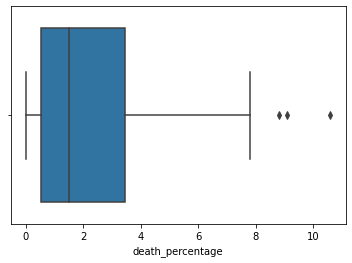

In [283]:
sns.boxplot(x = df['death_percentage'])

In [284]:
# To detect Extreme Outliers

q1 = df['death_percentage'].quantile(0.25)
q2 = df['death_percentage'].quantile(0.50)
q3 = df['death_percentage'].quantile(0.75)
median = df['death_percentage'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 0.525
Q2 : 1.5
Q3 : 3.45
median : 1.5
Upper Tail : 12.225000000000001
Lower Tail : -8.25


In [285]:
df['death_percentage'].median()

1.5

In [286]:
median_death_percentage = df.loc[(df['death_percentage'] <= upper_tail) & 
                            (df['death_percentage'] >= lower_tail),'death_percentage'].median()
    
median_death_percentage

1.5

In [287]:
df.loc[(df['death_percentage'] > upper_tail) |
                            (df['death_percentage'] < lower_tail),'death_percentage'] = median_death_percentage

In [288]:
df.loc[(df['death_percentage'] > upper_tail) |
                            (df['death_percentage'] < lower_tail),'death_percentage']

Series([], Name: death_percentage, dtype: float64)

<AxesSubplot:xlabel='death_percentage'>

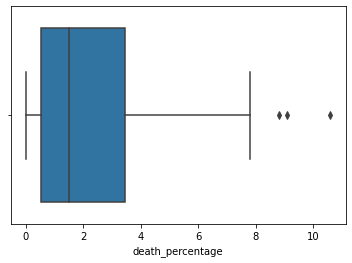

In [289]:
sns.boxplot(x = df['death_percentage'])

<AxesSubplot:xlabel='death_percentage'>

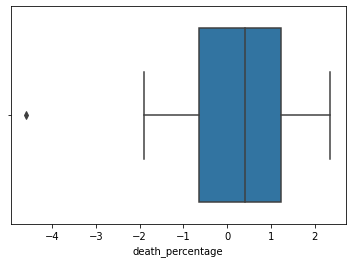

In [290]:
sns.boxplot(x = np.log(df['death_percentage']))

In [291]:
# 8.Deaths_cum_risk

In [292]:
df["Deaths_cum_risk"]

0     0.03
1     0.10
2     0.20
3     1.49
4     1.30
5     0.17
6     0.11
7     0.13
8     0.03
9     0.11
10    0.00
11    0.09
12    0.21
13    0.24
14    0.62
15    0.32
16    0.61
17    0.02
18    0.01
19    0.12
20    0.03
21    0.17
22    0.53
23    0.12
24    0.57
25    0.11
26    0.08
27    0.28
28    0.13
29    0.05
30    0.48
31    0.02
32    0.04
33    0.05
34    0.03
Name: Deaths_cum_risk, dtype: float64

In [293]:
# 9.risk_of_prevalence_5yr

In [294]:
df["risk_of_prevalence_5yr"]

0      12278
1      49257
2      74398
3     459271
4     283842
5      65493
6      43484
7      25138
8      24928
9      39750
10       156
11     39150
12     82087
13    127493
14    300413
15     38602
16     80817
17      9637
18      2223
19     30640
20     14196
21     88272
22     68607
23     44398
24    103716
25     11928
26     26280
27     67909
28     62827
29     20448
30     81270
31     14812
32     55248
33     12315
34      8928
Name: risk_of_prevalence_5yr, dtype: int64

<AxesSubplot:xlabel='risk_of_prevalence_5yr'>

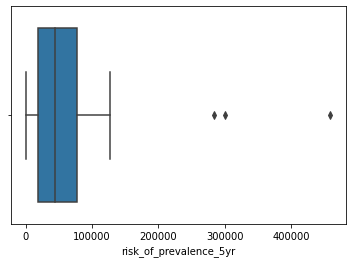

In [295]:
sns.boxplot(x = df['risk_of_prevalence_5yr'])

In [296]:
# To detect Extreme Outliers

q1 = df['risk_of_prevalence_5yr'].quantile(0.25)
q2 = df['risk_of_prevalence_5yr'].quantile(0.50)
q3 = df['risk_of_prevalence_5yr'].quantile(0.75)
median = df['risk_of_prevalence_5yr'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 17630.0
Q2 : 43484.0
Q3 : 77607.5
median : 43484.0
Upper Tail : 257540.0
Lower Tail : -162302.5


In [297]:
df['risk_of_prevalence_5yr'].median()

43484.0

In [298]:
median_risk_of_prevalence_5yr = df.loc[(df['risk_of_prevalence_5yr'] <= upper_tail) & 
                            (df['risk_of_prevalence_5yr'] >= lower_tail),'risk_of_prevalence_5yr'].median()
    
median_risk_of_prevalence_5yr

39450.0

In [299]:
df.loc[(df['risk_of_prevalence_5yr'] > upper_tail) |
                            (df['risk_of_prevalence_5yr'] < lower_tail),'risk_of_prevalence_5yr'] = median_risk_of_prevalence_5yr

In [300]:
df.loc[(df['risk_of_prevalence_5yr'] > upper_tail) |
                            (df['risk_of_prevalence_5yr'] < lower_tail),'risk_of_prevalence_5yr']

Series([], Name: risk_of_prevalence_5yr, dtype: int64)

<AxesSubplot:xlabel='risk_of_prevalence_5yr'>

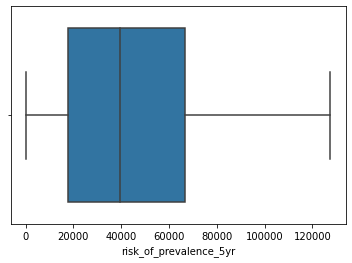

In [301]:
sns.boxplot(x = df['risk_of_prevalence_5yr'])

In [302]:
# 10.per100k_5yr_prevalence

In [303]:
df["per100k_5yr_prevalence"]

0      0.89
1      3.57
2      5.39
3     69.28
4     42.82
5      4.75
6      6.56
7      1.82
8      1.81
9      2.88
10     0.01
11     2.84
12     5.95
13     9.24
14    21.77
15     2.80
16     5.86
17     0.70
18     0.16
19     2.22
20     1.03
21     6.40
22     4.97
23     3.22
24    15.65
25     0.86
26     3.66
27     9.47
28     4.55
29     1.48
30     5.89
31     2.07
32     4.00
33     1.86
34     1.35
Name: per100k_5yr_prevalence, dtype: float64

<AxesSubplot:xlabel='per100k_5yr_prevalence'>

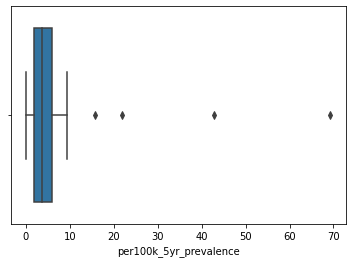

In [304]:
sns.boxplot(x = df['per100k_5yr_prevalence'])

In [305]:
# To detect Extreme Outliers

q1 = df['per100k_5yr_prevalence'].quantile(0.25)
q2 = df['per100k_5yr_prevalence'].quantile(0.50)
q3 = df['per100k_5yr_prevalence'].quantile(0.75)
median = df['per100k_5yr_prevalence'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 1.815
Q2 : 3.57
Q3 : 5.92
median : 3.57
Upper Tail : 18.235
Lower Tail : -10.500000000000002


In [306]:
df['per100k_5yr_prevalence'].median()

3.57

In [307]:
median_per100k_5yr_prevalence = df.loc[(df['per100k_5yr_prevalence'] <= upper_tail) & 
                            (df['per100k_5yr_prevalence'] >= lower_tail),'per100k_5yr_prevalence'].median()
    
median_per100k_5yr_prevalence

3.05

In [308]:
df.loc[(df['per100k_5yr_prevalence'] > upper_tail) |
                            (df['per100k_5yr_prevalence'] < lower_tail),'per100k_5yr_prevalence'] = median_per100k_5yr_prevalence

In [309]:
df.loc[(df['per100k_5yr_prevalence'] > upper_tail) |
                            (df['per100k_5yr_prevalence'] < lower_tail),'per100k_5yr_prevalence']

Series([], Name: per100k_5yr_prevalence, dtype: float64)

<AxesSubplot:xlabel='per100k_5yr_prevalence'>

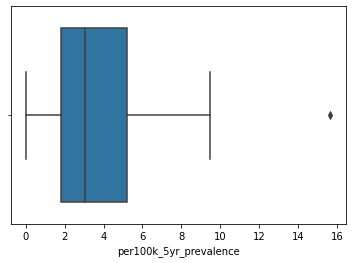

In [310]:
sns.boxplot(x = df['per100k_5yr_prevalence'])

In [311]:
df

,new_cases_number,new_cases_rank,new_case_percent,new_cases_cum_risk,Deaths Number,death_rank,death_percentage,Deaths_cum_risk,risk_of_prevalence_5yr,per100k_5yr_prevalence,...,cancer_type_Pancreas,cancer_type_Penis,cancer_type_Prostate,cancer_type_Rectum,cancer_type_Salivary glands,cancer_type_Stomach,cancer_type_Testis,cancer_type_Thyroid,cancer_type_Vagina,cancer_type_Vulva
0,5452,30,0.41,0.05,2776,29,0.33,0.03,12278,0.89,...,0,0,0,0,0,0,0,0,0,0
1,21096,17,1.60,0.19,11154,21,1.30,0.10,49257,3.57,...,0,0,0,0,0,0,0,0,0,0
2,31460,14,2.40,0.22,26656,10,3.10,0.20,74398,5.39,...,0,0,0,0,0,0,0,0,0,0
3,20001,1,1.50,0.19,90408,1,10.60,1.49,39450,3.05,...,0,0,0,0,0,0,0,0,0,0
4,20001,3,1.50,0.19,77348,2,9.10,1.30,39450,3.05,...,0,0,0,0,0,0,0,0,0,0
5,31646,13,2.40,0.28,19236,13,2.30,0.17,65493,4.75,...,0,0,0,0,0,0,0,0,0,0
6,16413,22,1.20,0.29,6385,23,0.75,0.11,43484,6.56,...,0,0,0,0,0,0,0,0,0,0
7,19570,20,1.50,0.17,14736,16,1.70,0.13,25138,1.82,...,0,0,0,0,0,0,0,0,0,0
8,9221,26,0.70,0.06,3513,28,0.41,0.03,24928,1.81,...,0,0,0,0,0,0,0,0,0,0
9,28489,15,2.20,0.26,11443,20,1.30,0.11,39750,2.88,...,0,0,0,0,0,0,0,0,0,0


# 4. Feature Selection

In [313]:
df = df.select_dtypes(exclude=object)
x = df.drop('Deaths Number',axis = 1)
y = df['Deaths Number']

In [314]:
x

,new_cases_number,new_cases_rank,new_case_percent,new_cases_cum_risk,death_rank,death_percentage,Deaths_cum_risk,risk_of_prevalence_5yr,per100k_5yr_prevalence,cancer_type_Anus,...,cancer_type_Pancreas,cancer_type_Penis,cancer_type_Prostate,cancer_type_Rectum,cancer_type_Salivary glands,cancer_type_Stomach,cancer_type_Testis,cancer_type_Thyroid,cancer_type_Vagina,cancer_type_Vulva
0,5452,30,0.41,0.05,29,0.33,0.03,12278,0.89,1,...,0,0,0,0,0,0,0,0,0,0
1,21096,17,1.60,0.19,21,1.30,0.10,49257,3.57,0,...,0,0,0,0,0,0,0,0,0,0
2,31460,14,2.40,0.22,10,3.10,0.20,74398,5.39,0,...,0,0,0,0,0,0,0,0,0,0
3,20001,1,1.50,0.19,1,10.60,1.49,39450,3.05,0,...,0,0,0,0,0,0,0,0,0,0
4,20001,3,1.50,0.19,2,9.10,1.30,39450,3.05,0,...,0,0,0,0,0,0,0,0,0,0
5,31646,13,2.40,0.28,13,2.30,0.17,65493,4.75,0,...,0,0,0,0,0,0,0,0,0,0
6,16413,22,1.20,0.29,23,0.75,0.11,43484,6.56,0,...,0,0,0,0,0,0,0,0,0,0
7,19570,20,1.50,0.17,16,1.70,0.13,25138,1.82,0,...,0,0,0,0,0,0,0,0,0,0
8,9221,26,0.70,0.06,28,0.41,0.03,24928,1.81,0,...,0,0,0,0,0,0,0,0,0,0
9,28489,15,2.20,0.26,20,1.30,0.11,39750,2.88,0,...,0,0,0,0,0,0,0,0,0,0


In [315]:
y

0      2776
1     11154
2     26656
3     90408
4     77348
5     19236
6      6385
7     14736
8      3513
9     11443
10       43
11     9897
12    21660
13    35392
14    75290
15    33793
16    66279
17     2296
18     1543
19    12556
20     4148
21    20390
22    58342
23    12703
24    32077
25    12153
26     4760
27    16783
28    16149
29     5127
30    53253
31     1252
32     4895
33     2723
34     1694
Name: Deaths Number, dtype: int64

# 5. model training

## Train Test Split

In [319]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train

,new_cases_number,new_cases_rank,new_case_percent,new_cases_cum_risk,death_rank,death_percentage,Deaths_cum_risk,risk_of_prevalence_5yr,per100k_5yr_prevalence,cancer_type_Anus,...,cancer_type_Pancreas,cancer_type_Penis,cancer_type_Prostate,cancer_type_Rectum,cancer_type_Salivary glands,cancer_type_Stomach,cancer_type_Testis,cancer_type_Thyroid,cancer_type_Vagina,cancer_type_Vulva
27,34540,12,2.60,0.64,14,2.00,0.28,67909,9.47,0,...,0,0,1,0,0,0,0,0,0,0
26,10677,25,0.81,0.20,26,0.56,0.08,26280,3.66,0,...,0,1,0,0,0,0,0,0,0,0
32,20432,19,1.50,0.15,25,0.57,0.04,55248,4.00,0,...,0,0,0,0,0,0,0,1,0,0
17,3916,32,0.30,0.03,31,0.27,0.02,9637,0.70,0,...,0,0,0,0,0,0,0,0,0,0
24,45701,8,3.50,0.74,9,3.80,0.57,103716,15.65,0,...,0,0,0,0,0,0,0,0,0,0
4,20001,3,1.50,0.19,2,9.10,1.30,39450,3.05,0,...,0,0,0,0,0,0,0,0,0,0
2,31460,14,2.40,0.22,10,3.10,0.20,74398,5.39,0,...,0,0,0,0,0,0,0,0,0,0
23,20617,18,1.60,0.19,17,1.50,0.12,44398,3.22,0,...,0,0,0,0,0,0,0,0,0,0
25,12642,24,0.95,0.11,19,1.40,0.11,11928,0.86,0,...,1,0,0,0,0,0,0,0,0,0
10,66,35,0.00,0.00,35,0.01,0.00,156,0.01,0,...,0,0,0,0,0,0,0,0,0,0


In [320]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
y_train

27    16783
26     4760
32     4895
17     2296
24    32077
4     77348
2     26656
23    12703
25    12153
10       43
31     1252
21    20390
30    53253
20     4148
18     1543
6      6385
13    35392
7     14736
34     1694
1     11154
16    66279
0      2776
15    33793
5     19236
11     9897
9     11443
8      3513
12    21660
Name: Deaths Number, dtype: int64

In [321]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_test

,new_cases_number,new_cases_rank,new_case_percent,new_cases_cum_risk,death_rank,death_percentage,Deaths_cum_risk,risk_of_prevalence_5yr,per100k_5yr_prevalence,cancer_type_Anus,...,cancer_type_Pancreas,cancer_type_Penis,cancer_type_Prostate,cancer_type_Rectum,cancer_type_Salivary glands,cancer_type_Stomach,cancer_type_Testis,cancer_type_Thyroid,cancer_type_Vagina,cancer_type_Vulva
14,20001,2,1.50,0.19,3,8.80,0.62,39450,3.05,0,...,0,0,0,0,0,0,0,0,0,0
19,14641,23,1.10,0.14,18,1.50,0.12,30640,2.22,0,...,0,0,0,0,0,0,0,0,0,0
3,20001,1,1.50,0.19,1,10.60,1.49,39450,3.05,0,...,0,0,0,0,0,0,0,0,0,0
29,7850,27,0.59,0.07,24,0.60,0.05,20448,1.48,0,...,0,0,0,0,1,0,0,0,0,0
33,5518,29,0.42,0.09,30,0.32,0.05,12315,1.86,0,...,0,0,0,0,0,0,0,0,1,0
28,28260,16,2.10,0.24,15,1.90,0.13,62827,4.55,0,...,0,0,0,1,0,0,0,0,0,0
22,63180,5,4.80,0.57,5,6.90,0.53,68607,4.97,0,...,0,0,0,0,0,0,0,0,0,0


In [322]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
y_test

14    75290
19    12556
3     90408
29     5127
33     2723
28    16149
22    58342
Name: Deaths Number, dtype: int64

In [323]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 44)
(7, 44)
(28,)
(7,)


In [324]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [325]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

LinearRegression()

# 6.Model Evaluation

In [326]:
# Matrice evaluation

In [327]:
## train evaluation

y_pred = linear_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred)
print("R Squared Value :",r_squared_value)

r2 = linear_reg_model.score(x_train, y_train) # Without Predict Function
print("R2 :",r2)

adj_r2 = 1 - (((1-r_squared_value) * (x_train.shape[0] - 1))/(x_train.shape[0]- x_train.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Squared Error : 1.4448889970041133e-17
Root Mean Squared Error : 3.801169552919355e-09
Mean Absolute Error : 2.5801796255109366e-09
R Squared Value : 1.0
R2 : 1.0
Adjusted R-Squared Value : 1.0


In [328]:
## test evaluation

y_pred = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred)
print("R Squared Value :",r_squared_value)

r2 = linear_reg_model.score(x_test, y_test) # Without Predict Function
print("R2 :",r2)

adj_r2 = 1 - (((1-r_squared_value) * (x_test.shape[0] - 1))/(x_test.shape[0]- x_test.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Squared Error : 1061010.9829443113
Root Mean Squared Error : 1030.0538738067594
Mean Absolute Error : 684.1254281918965
R Squared Value : 0.9990712357913206
R2 : 0.9990712357913206
Adjusted R-Squared Value : 1.0001466469803177


In [330]:
df

,new_cases_number,new_cases_rank,new_case_percent,new_cases_cum_risk,Deaths Number,death_rank,death_percentage,Deaths_cum_risk,risk_of_prevalence_5yr,per100k_5yr_prevalence,...,cancer_type_Pancreas,cancer_type_Penis,cancer_type_Prostate,cancer_type_Rectum,cancer_type_Salivary glands,cancer_type_Stomach,cancer_type_Testis,cancer_type_Thyroid,cancer_type_Vagina,cancer_type_Vulva
0,5452,30,0.41,0.05,2776,29,0.33,0.03,12278,0.89,...,0,0,0,0,0,0,0,0,0,0
1,21096,17,1.60,0.19,11154,21,1.30,0.10,49257,3.57,...,0,0,0,0,0,0,0,0,0,0
2,31460,14,2.40,0.22,26656,10,3.10,0.20,74398,5.39,...,0,0,0,0,0,0,0,0,0,0
3,20001,1,1.50,0.19,90408,1,10.60,1.49,39450,3.05,...,0,0,0,0,0,0,0,0,0,0
4,20001,3,1.50,0.19,77348,2,9.10,1.30,39450,3.05,...,0,0,0,0,0,0,0,0,0,0
5,31646,13,2.40,0.28,19236,13,2.30,0.17,65493,4.75,...,0,0,0,0,0,0,0,0,0,0
6,16413,22,1.20,0.29,6385,23,0.75,0.11,43484,6.56,...,0,0,0,0,0,0,0,0,0,0
7,19570,20,1.50,0.17,14736,16,1.70,0.13,25138,1.82,...,0,0,0,0,0,0,0,0,0,0
8,9221,26,0.70,0.06,3513,28,0.41,0.03,24928,1.81,...,0,0,0,0,0,0,0,0,0,0
9,28489,15,2.20,0.26,11443,20,1.30,0.11,39750,2.88,...,0,0,0,0,0,0,0,0,0,0


# 7.Testing on Single Row

In [350]:
# Indepned varibale(Fratures):-
    
new_cases_number = 5421.00
new_cases_rank= 26.00
new_case_percent= 0.42
new_cases_cum_risk= 0.06
death_rank= 26.00
death_percentage= 0.25
Deaths_cum_risk= 0.04
risk_of_prevalence_5yr= 10278.00
per100k_5yr_prevalence= 0.78
cancer_type= 'Lung'


# Depended varibale (features)= 'Deaths Number'==?

In [351]:
column_names = x.columns
column_names

Index(['new_cases_number', 'new_cases_rank', 'new_case_percent',
       'new_cases_cum_risk', 'death_rank', 'death_percentage',
       'Deaths_cum_risk', 'risk_of_prevalence_5yr', 'per100k_5yr_prevalence',
       'cancer_type_Anus', 'cancer_type_Bladder',
       'cancer_type_Brain, central nervous system', 'cancer_type_Breast',
       'cancer_type_Cervix uteri', 'cancer_type_Colon',
       'cancer_type_Corpus uteri', 'cancer_type_Gallbladder',
       'cancer_type_Hodgkin lymphoma', 'cancer_type_Hypopharynx',
       'cancer_type_Kaposi sarcoma', 'cancer_type_Kidney',
       'cancer_type_Larynx', 'cancer_type_Leukaemia',
       'cancer_type_Lip, oral cavity', 'cancer_type_Liver', 'cancer_type_Lung',
       'cancer_type_Melanoma of skin', 'cancer_type_Mesothelioma',
       'cancer_type_Multiple myeloma', 'cancer_type_Nasopharynx',
       'cancer_type_Non-Hodgkin lymphoma', 'cancer_type_Oesophagus',
       'cancer_type_Oropharynx', 'cancer_type_Ovary', 'cancer_type_Pancreas',
       'cance

In [352]:
project_data = {'columns' : list(x.columns)}

In [353]:
cancer_type =  'cancer_type_' + cancer_type
cancer_type_index = np.where(column_names == cancer_type)[0][0]

In [354]:
test_array = np.zeros(x.shape[1])
test_array[0] = new_cases_number
test_array[1] = new_cases_rank
test_array[2] = new_case_percent
test_array[3] = new_cases_cum_risk
test_array[4] = death_rank
test_array[0] = death_percentage
test_array[0] = Deaths_cum_risk
test_array[0] = risk_of_prevalence_5yr
test_array[0] = per100k_5yr_prevalence
test_array[0] = test_array[cancer_type_index] = 1

test_array

array([ 1.  , 26.  ,  0.42,  0.06, 26.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

In [355]:
model.predict([test_array])

F:\ANACONDA\envs\env_abhi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([928.25112291])

In [356]:
with open('Linear_Model.pkl','wb') as f:
    pickle.dump(model,f)

In [360]:
with open("project_data.json",'w') as f:
    json.dump(project_data,f)